In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from urllib.parse import urlparse
import spacy

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./datasets/comics_reddit.csv')
df.head()

,title,post,subreddit,up_votes,up_vote_ratio
0,"Weekly Discussion Thread: Comics, TV, and More...",Hey there honorary Justice League members - it...,DCcomics,16,0.84
1,Dead Boy Detectives Megathread,# [***Dead Boy Detectives***](https://m.media-...,DCcomics,12,0.80
2,[Comic Excerpt] Tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96
3,[Comic Excerpt] Bros really thought they could...,NaN,DCcomics,65,0.90
4,"[Discussion] It’s Donna Troy’s birthday, say s...",Artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99


In [4]:
df.shape

(2891, 5)

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(2526, 5)

Removing duplicate posts reduces the dataframe from 2,891 records to 2,526 records

In [7]:
df['subreddit'].value_counts()

subreddit
DCcomics    1290
Marvel      1236
Name: count, dtype: int64

In [8]:
df['subreddit'].value_counts(normalize = True)

subreddit
DCcomics    0.510689
Marvel      0.489311
Name: proportion, dtype: float64

In [9]:
df.groupby('subreddit').mean('up_votes').reset_index()

,subreddit,up_votes,up_vote_ratio
0,DCcomics,71.815504,0.739264
1,Marvel,211.073625,0.746926


In [10]:
df.groupby('subreddit').median('up_votes').reset_index()

,subreddit,up_votes,up_vote_ratio
0,DCcomics,13.0,0.82
1,Marvel,10.0,0.83


In [11]:
mean_up_votes_df = df.groupby('subreddit').mean('up_votes').reset_index()
median_up_votes_df = df.groupby('subreddit').median('up_votes').reset_index()

In [12]:
df.groupby('subreddit').mean('up_vote_ratio').reset_index()

,subreddit,up_votes,up_vote_ratio
0,DCcomics,71.815504,0.739264
1,Marvel,211.073625,0.746926


### There is a big difference in the mean on upvotes, but not in the median. Should investigate the distribution of upvotes.

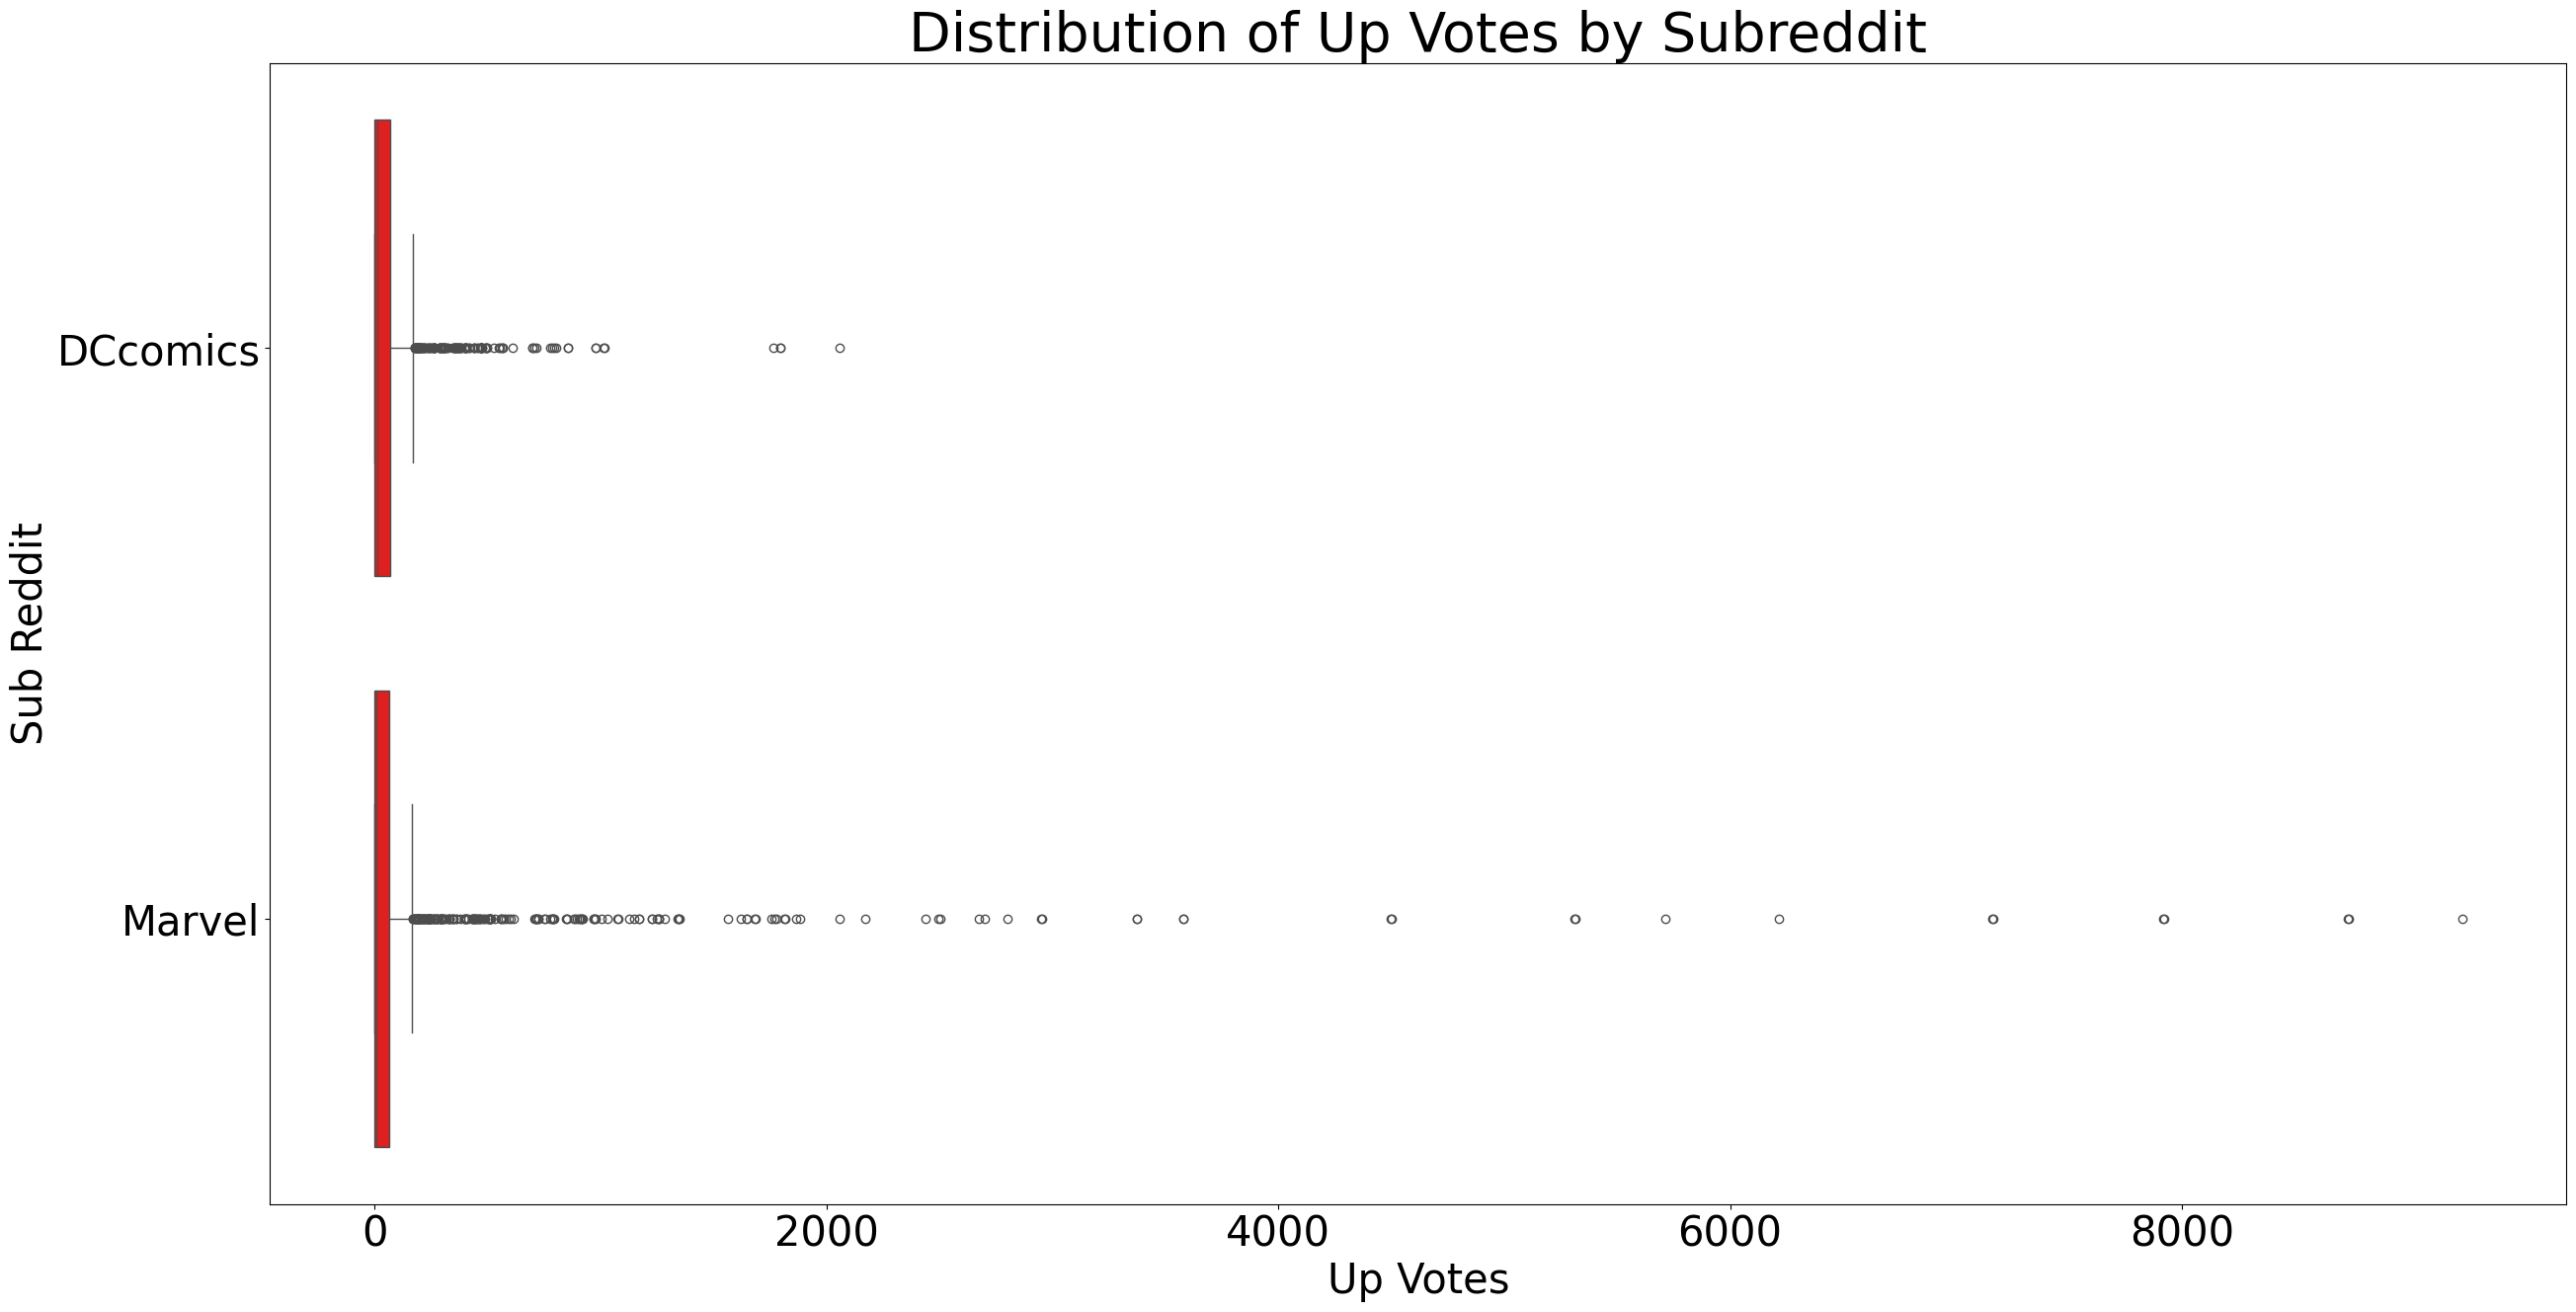

In [13]:
plt.figure(figsize = (30, 15))

sns.boxplot(x = df['up_votes'],
            y = df['subreddit'], color = 'red')

plt.title('Distribution of Up Votes by Subreddit', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Up Votes', size = 30)
plt.ylabel('Sub Reddit', size = 30);

plt.savefig('../project-3/images/up_vote_distribution_by_subreddit', dpi = 192)

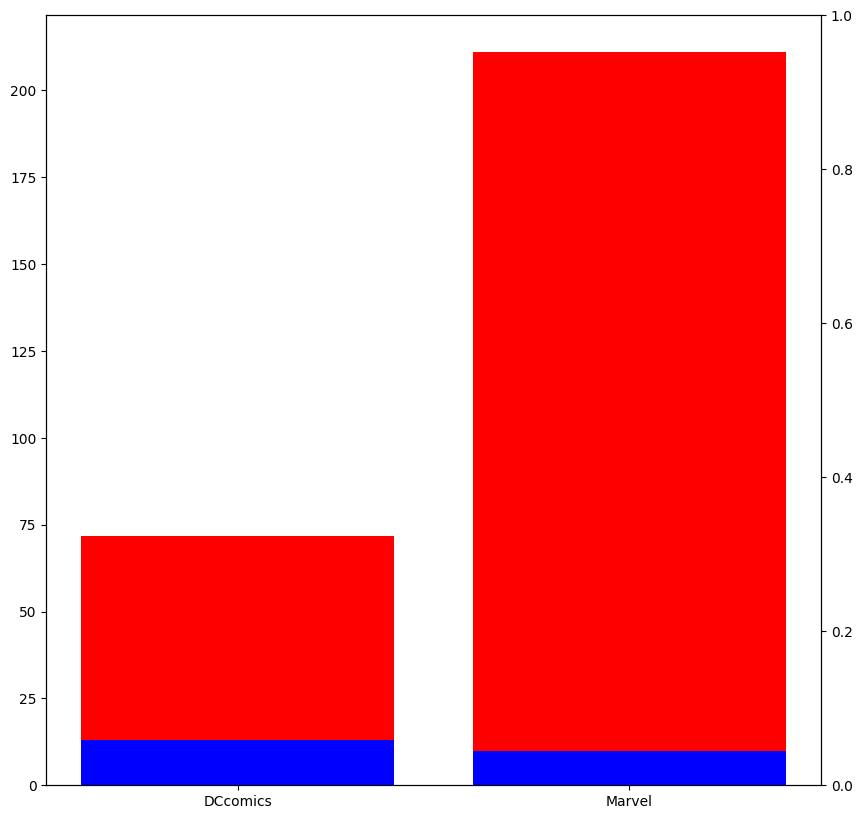

In [14]:
# Not how I'm looking for the mean vs median
fig, ax1 = plt.subplots(figsize = (10,10))

ax2 = ax1.twinx()

bar_container = ax1.bar(mean_up_votes_df['subreddit'], mean_up_votes_df['up_votes'], label = 'Mean Up Votes', color = 'red')
bar_container2 = ax1.bar(median_up_votes_df['subreddit'], median_up_votes_df['up_votes'], label = 'Mean Up Votes', color = 'blue')

In [15]:
grouped = df.groupby('subreddit')[['up_votes', 'up_vote_ratio']].agg(['mean', 'median']).reset_index()
grouped

subreddit    up_votes        up_vote_ratio       
                   mean median          mean median
0  DCcomics   71.815504   13.0      0.739264   0.82
1    Marvel  211.073625   10.0      0.746926   0.83

In [16]:
# Deleting column names
grouped.columns = [''] * len(grouped.columns)

#Then creating new column names
colnames = ['subreddit', 'up_votes_mean', 'up_votes_median', 'up_votes_ratio_mean', 'up_votes_ratio_median']

#Then adding the column names back in
grouped.columns = colnames
grouped

,subreddit,up_votes_mean,up_votes_median,up_votes_ratio_mean,up_votes_ratio_median
0,DCcomics,71.815504,13.0,0.739264,0.82
1,Marvel,211.073625,10.0,0.746926,0.83


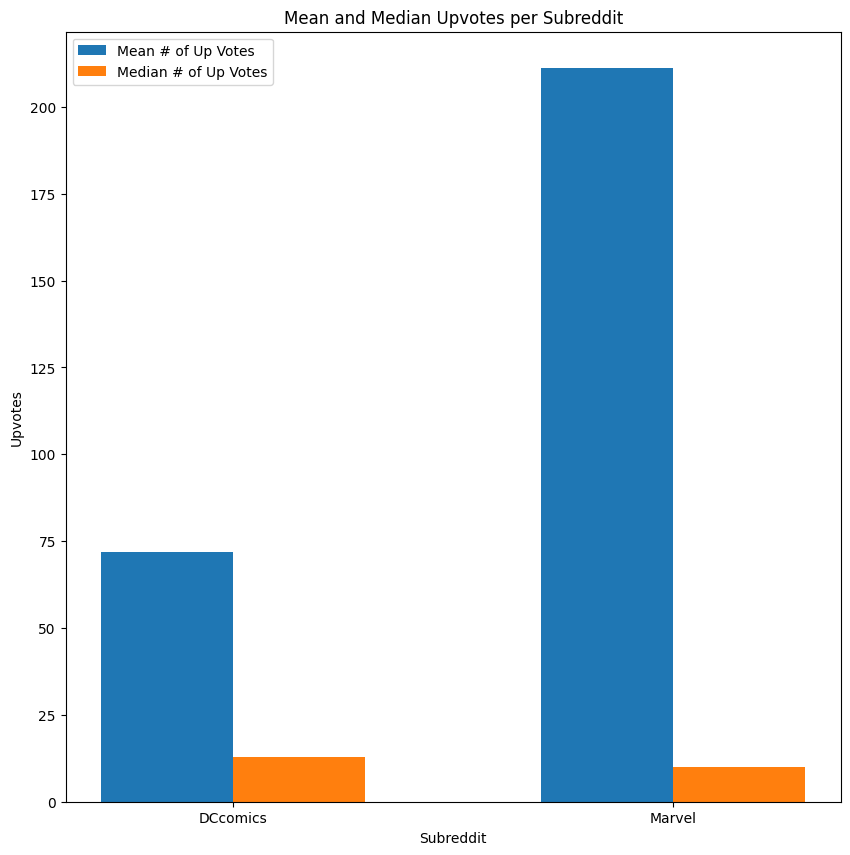

In [17]:
# Had ChatGPT's help with this
plt.figure(figsize = (10, 10))

bar_width = 0.3

positions = range(len(grouped))

plt.bar(positions, grouped['up_votes_mean'], bar_width, label = 'Mean # of Up Votes')
plt.bar([p + bar_width for p in positions], grouped['up_votes_median'], bar_width, label = 'Median # of Up Votes')

plt.xlabel('Subreddit')
plt.ylabel('Upvotes')
plt.title('Mean and Median Upvotes per Subreddit')
plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'])
plt.legend()

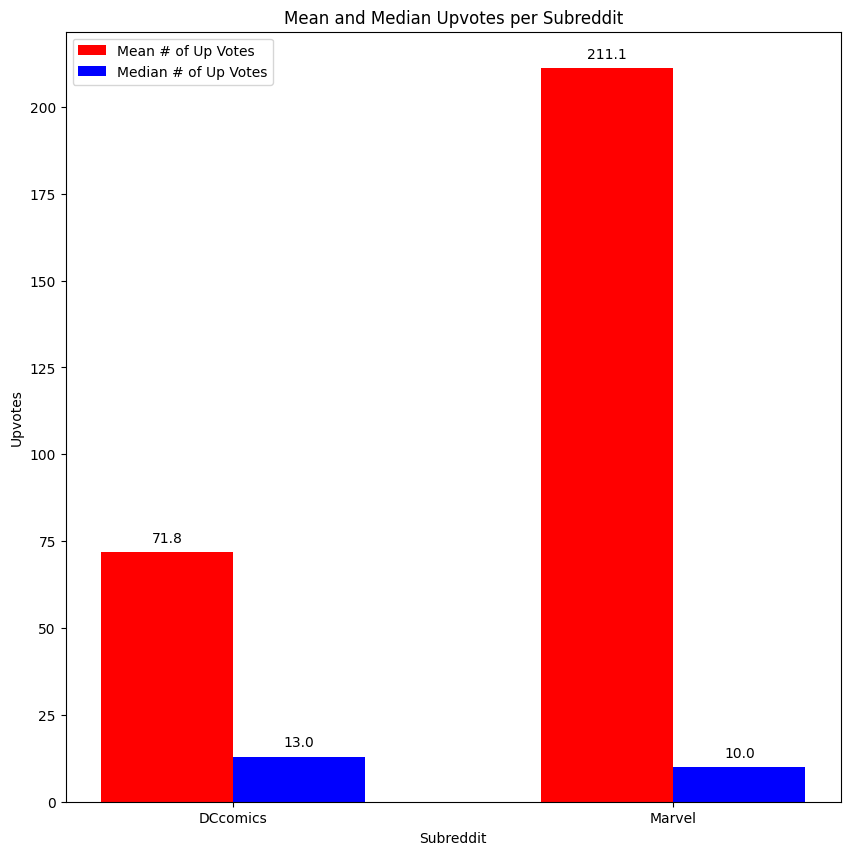

In [18]:
# Now adding the labels onto the data
plt.figure(figsize = (10, 10))

bar_width = 0.3

positions = range(len(grouped))

#Plotting mean values with labels
bars_mean = plt.bar(positions, grouped['up_votes_mean'], bar_width, label = 'Mean # of Up Votes', color = 'red')
for i, bar in enumerate(bars_mean):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
             f'{grouped["up_votes_mean"][i]:.1f}',
             ha = 'center', va = 'bottom')

#Plotting median values with labels
bars_median = plt.bar([p + bar_width for p in positions], grouped['up_votes_median'], bar_width, label = 'Median # of Up Votes', color = 'blue')
for i, bar in enumerate(bars_median):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
             f'{grouped["up_votes_median"][i]:.1f}',
             ha = 'center', va = 'bottom')

plt.xlabel('Subreddit')
plt.ylabel('Upvotes')
plt.title('Mean and Median Upvotes per Subreddit')
plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'])
plt.legend();

In [19]:
# Couldn't fig

# #Adding in the Up Vote Percentage
# fig, ax1 = plt.subplots(figsize = (10, 10))
# ax2 = ax1.twinx()

# bar_width = 0.3

# # This is 2 - since there's 2 rows in this data frame (for Marvel & DC)
# positions = range(len(grouped))

# #Plotting mean values with labels
# bars_mean = plt.bar(positions, grouped['up_votes_mean'], bar_width, label = 'Mean # of Up Votes', color = 'lightcoral')
# for i, bar in enumerate(bars_mean):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
#              f'{grouped["up_votes_mean"][i]:.1f}',
#              ha = 'center', va = 'bottom')

# #Plotting median values with labels
# bars_median = plt.bar([p + bar_width for p in positions], grouped['up_votes_median'], bar_width, label = 'Median # of Up Votes', color = 'darkred')
# for i, bar in enumerate(bars_median):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
#              f'{grouped["up_votes_median"][i]:.1f}',
#              ha = 'center', va = 'bottom')

# #Plotting Mean_Up_Vote_Ratio
#                 #Making this on ratio #2
# bars_mean_ratio = ax2.bar([p + bar_width *2 for p in positions], grouped['up_votes_ratio_mean'], bar_width, label = 'Mean Up Vote Ratio', color = 'blue')
# for i, bar in enumerate(bars_mean_ratio):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
#              f'{grouped["up_votes_ratio_mean"][i]:.3f}',
#              ha = 'center', va = 'bottom' )

# plt.xlabel('Subreddit', size = 15)
# ax1.set_ylabel('Up Vote Ratio', color = 'blue', size = 15)
# ax2.set_ylabel('Number of Up Votes', color = 'red', size = 15)
# plt.title('Up Votes per Subreddit')
# plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'], size = 15)
# plt.legend();

In [20]:
df['title_length'] = df['title'].str.len()
df['post_length'] = df['post'].str.len()

### Making everything lower case

In [21]:
df['title'] = df['title'].str.lower()
df['post'] = df['post'].str.lower()

In [22]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,title_length,post_length
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,98,4799.0
1,dead boy detectives megathread,# [***dead boy detectives***](https://m.media-...,DCcomics,12,0.80,30,1943.0
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,80,NaN
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,119,NaN
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,69,86.0


### Removing URLs from title and post

In [23]:
#https://stackoverflow.com/questions/56358888/how-to-remove-https-links-from-a-string-column-in-pandas
df['post_new'] = df['post'].str.replace(r'https?:[^\s<>"]+|www\.[^\s<>"]+', "", regex = True)
df.head(20)

,title,post,subreddit,up_votes,up_vote_ratio,title_length,post_length,post_new
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,98,4799.0,hey there honorary justice league members - it...
1,dead boy detectives megathread,# [***dead boy detectives***](https://m.media-...,DCcomics,12,0.80,30,1943.0,# [***dead boy detectives***](\n\n**time/date:...
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,80,NaN,NaN
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,119,NaN,NaN
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,69,86.0,artist:
5,[artwork] dc alterverse redesign - wonder woma...,NaN,DCcomics,150,0.98,84,NaN,NaN
6,"[comic excerpt] starfire, catwoman, and power ...",NaN,DCcomics,64,0.96,112,NaN,NaN
7,[fan art] the phenomenal sideways by (@karahuset),NaN,DCcomics,62,0.98,49,NaN,NaN
8,[discussion] flash should get his own animated...,i think it’s criminal that flash has been arou...,DCcomics,36,0.86,54,160.0,i think it’s criminal that flash has been arou...
9,[comic excerpt] new superhero lightning-man mi...,NaN,DCcomics,75,0.97,87,NaN,NaN


In [24]:
print(df['post'][0])
df['post_new'][0]

hey there honorary justice league members - it’s a new week which means it’s time for a new discussion thread!

- predaplant's pick of the week: [*detective comics* #1084](https://m.media-amazon.com/images/i/81rmbjtzmul.jpg)

**for those who don't know:** the way this works is that several comments will list this week’s releases, for any given title discussion you should respond to that comment. for example, *wonder woman* discussion would go in the replies to the "wonder woman" comment. clicking the titles in this post will take you directly to that comment, too. in other words, you should only be replying to other comments. **do not post top-level comments**. 

**keep discussion civil.** do not harass other users for having a different opinion. do not use this thread to push your personal one-sided grudges against creators. reacting to a panel on twitter is not the same as reading a book.

&amp;nbsp;

**quick links:** [**weekly meta discussions thread**](https://www.reddit.com/r/dcco

'hey there honorary justice league members - it’s a new week which means it’s time for a new discussion thread!\n\n- predaplant\'s pick of the week: [*detective comics* #1084](\n\n**for those who don\'t know:** the way this works is that several comments will list this week’s releases, for any given title discussion you should respond to that comment. for example, *wonder woman* discussion would go in the replies to the "wonder woman" comment. clicking the titles in this post will take you directly to that comment, too. in other words, you should only be replying to other comments. **do not post top-level comments**. \n\n**keep discussion civil.** do not harass other users for having a different opinion. do not use this thread to push your personal one-sided grudges against creators. reacting to a panel on twitter is not the same as reading a book.\n\n&amp;nbsp;\n\n**quick links:** [**weekly meta discussions thread**]( | [**current jump-in points**]( | [**weekly discussion archives**](

In [25]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')

    return url_pattern.sub(r'', text)

In [26]:
# df['post3'] = df['post'].apply(remove_urls)
# df

In [27]:
#Where ]( are together create a space so I can find each URL
df['post'] = df['post'].str.replace('](', '] (')
df['post']

0       hey there honorary justice league members - it...
1       # [***dead boy detectives***] (https://m.media...
2                                                     NaN
3                                                     NaN
4       artist: https://www.tumblr.com/fatimajpeg/6998...
                              ...                        
2886                                                  NaN
2887                                                  NaN
2888    greg land being pretty self-aware about roxxon...
2889                                                  NaN
2890                                                  NaN
Name: post, Length: 2526, dtype: object

In [28]:
print(df['post'][1])

# [***dead boy detectives***] (https://m.media-amazon.com/images/m/mv5bzjy4ngiyzwetn2zmns00yti2lwe2ywmtzddimmfkyta3zmy0xkeyxkfqcgdeqxvymdm2ndm2mq@@._v1_fmjpg_ux450_.jpg)

**time/date:** april 25, 2024

**network/channel:** netflix

remember:

1. don't be a jerk

2. don't talk about piracy

3. don't spoil anything ahead of the episode which the subthread is about

[*trailer*] (https://www.youtube.com/watch?v=hwjmz2ekfbc)

[*rotten tomatoes*] (https://www.rottentomatoes.com/tv/dead_boy_detectives)

[*imdb*] (https://www.imdb.com/title/tt15358446/)

_____

## do not post top-level comments. keep spoiler discussion limited to their respective episode threads below:

* [spoiler-free discussion] (https://reddit.com/r/dccomics/comments/1cc068f/dead_boy_detectives_megathread/l11w5d7/)

* [s01e01 - the case of crystal palace] (https://reddit.com/r/dccomics/comments/1cc068f/dead_boy_detectives_megathread/l11w6iq/)
* [s01e02 - the case of the dandelion shrine] (https://reddit.com/r/dccomics/comme

In [29]:
# nlp = spacy.load('en_core_web_md')

# # def remove_urls(text):
# #     doc = nlp(text) #Takes the text inputted and runs spacy against it

# #     non_url_words = [] #Create an empty list of words to store non-url words

# #     for word in doc:  #For each word in the document
# #         if word.like_url: #If it's like a URL, do nothing
# #             pass
# #         else: #If it's not a URL, then append the word back to the non_url words
# #             non_url_words.append(word.text)
            
# #     new_post_no_urls = ''

# #     for non_url_word in non_url_words:
# #         new_post_no_urls.append(' '.join(non_url_word))

# #     return new_post_no_urls
    

In [30]:
nlp = spacy.load('en_core_web_md')

def remove_urls(texts):
    for i in texts.index:
        text = texts[i]

        if pd.notnull(text):
            doc = nlp(text) #Takes the text inputted and runs spacy against it
    
            non_url_words = [] #Create an empty list of words to store non-url words
    
            for word in doc:  #For each word in the document
                if not word.like_url: 
                    non_url_words.append(word.text)
    
            texts[i] = ' '.join(non_url_words)

In [31]:
df['post'][1]

"# [***dead boy detectives***] (https://m.media-amazon.com/images/m/mv5bzjy4ngiyzwetn2zmns00yti2lwe2ywmtzddimmfkyta3zmy0xkeyxkfqcgdeqxvymdm2ndm2mq@@._v1_fmjpg_ux450_.jpg)\n\n**time/date:** april 25, 2024\n\n**network/channel:** netflix\n\nremember:\n\n1. don't be a jerk\n\n2. don't talk about piracy\n\n3. don't spoil anything ahead of the episode which the subthread is about\n\n[*trailer*] (https://www.youtube.com/watch?v=hwjmz2ekfbc)\n\n[*rotten tomatoes*] (https://www.rottentomatoes.com/tv/dead_boy_detectives)\n\n[*imdb*] (https://www.imdb.com/title/tt15358446/)\n\n_____\n\n## do not post top-level comments. keep spoiler discussion limited to their respective episode threads below:\n\n* [spoiler-free discussion] (https://reddit.com/r/dccomics/comments/1cc068f/dead_boy_detectives_megathread/l11w5d7/)\n\n* [s01e01 - the case of crystal palace] (https://reddit.com/r/dccomics/comments/1cc068f/dead_boy_detectives_megathread/l11w6iq/)\n* [s01e02 - the case of the dandelion shrine] (https:/

In [32]:
doc = nlp(df['post'][1])

In [33]:
doc

# [***dead boy detectives***] (https://m.media-amazon.com/images/m/mv5bzjy4ngiyzwetn2zmns00yti2lwe2ywmtzddimmfkyta3zmy0xkeyxkfqcgdeqxvymdm2ndm2mq@@._v1_fmjpg_ux450_.jpg)

**time/date:** april 25, 2024

**network/channel:** netflix

remember:

1. don't be a jerk

2. don't talk about piracy

3. don't spoil anything ahead of the episode which the subthread is about

[*trailer*] (https://www.youtube.com/watch?v=hwjmz2ekfbc)

[*rotten tomatoes*] (https://www.rottentomatoes.com/tv/dead_boy_detectives)

[*imdb*] (https://www.imdb.com/title/tt15358446/)

_____

## do not post top-level comments. keep spoiler discussion limited to their respective episode threads below:

* [spoiler-free discussion] (https://reddit.com/r/dccomics/comments/1cc068f/dead_boy_detectives_megathread/l11w5d7/)

* [s01e01 - the case of crystal palace] (https://reddit.com/r/dccomics/comments/1cc068f/dead_boy_detectives_megathread/l11w6iq/)
* [s01e02 - the case of the dandelion shrine] (https://reddit.com/r/dccomics/comme

In [34]:
non_url_words = []

for token in doc:
    if not token.like_url and not token.is_punct and not token.text == "n't":
        #If it's not a URL, punctuation or "n't" (since not is a stop word), append it to the empty list of non-url-words
        non_url_words.append(token.text)

non_url_words

# ' '.join(x for x in non_url_words) #Take the empty list of not_url_words and join them with spaces

['dead',
 'boy',
 'detectives',
 '\n\n',
 'time',
 'date',
 'april',
 '25',
 '2024',
 '\n\n',
 'network',
 'channel',
 'netflix',
 '\n\n',
 'remember',
 '\n\n',
 '1',
 'do',
 'be',
 'a',
 'jerk',
 '\n\n',
 '2',
 'do',
 'talk',
 'about',
 'piracy',
 '\n\n',
 '3',
 'do',
 'spoil',
 'anything',
 'ahead',
 'of',
 'the',
 'episode',
 'which',
 'the',
 'subthread',
 'is',
 'about',
 '\n\n',
 'trailer',
 '\n\n',
 'rotten',
 'tomatoes',
 '\n\n',
 'imdb',
 '\n\n',
 '\n\n',
 'do',
 'not',
 'post',
 'top',
 'level',
 'comments',
 'keep',
 'spoiler',
 'discussion',
 'limited',
 'to',
 'their',
 'respective',
 'episode',
 'threads',
 'below',
 '\n\n',
 'spoiler',
 'free',
 'discussion',
 '\n\n',
 's01e01',
 'the',
 'case',
 'of',
 'crystal',
 'palace',
 '\n',
 's01e02',
 'the',
 'case',
 'of',
 'the',
 'dandelion',
 'shrine',
 '\n',
 's01e03',
 'the',
 'case',
 'of',
 'the',
 'devlin',
 'house',
 '\n',
 's01e04',
 'the',
 'case',
 'of',
 'the',
 'lighthouse',
 'leapers',
 '\n',
 's01e05',
 'the',
 

In [35]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,title_length,post_length,post_new
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,98,4799.0,hey there honorary justice league members - it...
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,30,1943.0,# [***dead boy detectives***](\n\n**time/date:...
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,80,NaN,NaN
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,119,NaN,NaN
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,69,86.0,artist:


In [36]:
df['post']

0       hey there honorary justice league members - it...
1       # [***dead boy detectives***] (https://m.media...
2                                                     NaN
3                                                     NaN
4       artist: https://www.tumblr.com/fatimajpeg/6998...
                              ...                        
2886                                                  NaN
2887                                                  NaN
2888    greg land being pretty self-aware about roxxon...
2889                                                  NaN
2890                                                  NaN
Name: post, Length: 2526, dtype: object

In [37]:
def remove_urls(texts):
    nlp = spacy.load('en_core_web_md') #Calling Spacy object in beginning of function
    list_of_new_posts = [] #Empty list of new posts
    
    for i in texts.index:
        text = texts[i]

        if pd.notnull(text):
            non_url_words = []
            text2 = nlp(text)
        
            for token in text2:
                if not token.like_url and not token.is_punct and not token.text == "n't":
                    #If it's not a URL, punctuation or "n't" (since not is a stop word), append it to the empty list of non-url-words
                    non_url_words.append(token.text)
            
            non_url_words

            new_post = ' '.join(x for x in non_url_words)
            list_of_new_posts.append(new_post)

        #If it is null, append an empty string to the list
        else:
            list_of_new_posts.append('')
        
    return list_of_new_posts
        #' '.join(x for x in non_url_words) #Take the empty list of not_url_words and join them with spaces

In [38]:
df['clean_title'] = remove_urls(df['title'])
df['clean_post'] = remove_urls(df['post'])

In [41]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,title_length,post_length,post_new,clean_post
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,98,4799.0,hey there honorary justice league members - it...,hey there honorary justice league members it ’...
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,30,1943.0,# [***dead boy detectives***](\n\n**time/date:...,dead boy detectives \n\n time date april 25 20...
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,80,NaN,NaN,
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,119,NaN,NaN,
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,69,86.0,artist:,artist


In [265]:
df['clean_post'][1]

'dead boy detectives \n\n time date april 25 2024 \n\n network channel netflix \n\n remember \n\n 1 do be a jerk \n\n 2 do talk about piracy \n\n 3 do spoil anything ahead of the episode which the subthread is about \n\n trailer \n\n rotten tomatoes \n\n imdb \n\n \n\n do not post top level comments keep spoiler discussion limited to their respective episode threads below \n\n spoiler free discussion \n\n s01e01 the case of crystal palace \n s01e02 the case of the dandelion shrine \n s01e03 the case of the devlin house \n s01e04 the case of the lighthouse leapers \n s01e05 the case of the two dead dragons \n s01e06 the case of the creeping forest \n s01e07 the case of the very long stairway \n s01e08 the case of the hungry snake \n\n \n\n join us on discord \n\n for memes come to r dccomicscirclejerk'

In [ ]:
df.shape

### Removing punctuation from title and post

In [68]:
punctuation = """!@#$%^&*()-_=+`~[]{}\|/?;':",.<>"""
punctuation

'!@#$%^&*()-_=+`~[]{}\\|/?;\':",.<>'

In [72]:
for title in df['title']:
    for word in title:
        for letter in word:
            if letter in punctuation:
                title = title.replace(word, "")

In [266]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,title_length,post_length,post_new,clean_post
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,98,4799.0,hey there honorary justice league members - it...,hey there honorary justice league members it ’...
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,30,1943.0,# [***dead boy detectives***](\n\n**time/date:...,dead boy detectives \n\n time date april 25 20...
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,80,NaN,NaN,
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,119,NaN,NaN,
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,69,86.0,artist:,artist


### Adding length of titles and posts

In [259]:
df['title_length'] = df['title'].str.len()
df['post_length'] = df['post'].str.len()


,title,post,subreddit,up_votes,up_vote_ratio,title_length,post_length
0,"Weekly Discussion Thread: Comics, TV, and More...",Hey there honorary Justice League members - it...,DCcomics,16,0.84,98,4799.0
1,Dead Boy Detectives Megathread,# [***Dead Boy Detectives***](https://m.media-...,DCcomics,12,0.80,30,1943.0
2,[Comic Excerpt] Tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,80,NaN
3,[Comic Excerpt] Bros really thought they could...,NaN,DCcomics,65,0.90,119,NaN
4,"[Discussion] It’s Donna Troy’s birthday, say s...",Artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,69,86.0
...,...,...,...,...,...,...,...
2886,Iron Man #18 Preview,NaN,Marvel,4,0.75,20,NaN
2887,Do you think the new Ultimate imprint is bette...,NaN,Marvel,301,0.91,90,NaN
2888,Are there real Greg Land heads out there?,Greg Land being pretty self-aware about Roxxon...,Marvel,51,0.83,41,444.0
2889,X-men #34,NaN,Marvel,4,0.83,9,NaN


In [263]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split(' ') ) )
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,title_length,post_length,title_word_count
0,"Weekly Discussion Thread: Comics, TV, and More...",Hey there honorary Justice League members - it...,DCcomics,16,0.84,98,4799.0,17
1,Dead Boy Detectives Megathread,# [***Dead Boy Detectives***](https://m.media-...,DCcomics,12,0.80,30,1943.0,4
2,[Comic Excerpt] Tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,80,NaN,13
3,[Comic Excerpt] Bros really thought they could...,NaN,DCcomics,65,0.90,119,NaN,20
4,"[Discussion] It’s Donna Troy’s birthday, say s...",Artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,69,86.0,10
